In [1]:
import pandas as pd

csv = 'driving_log.csv'
data = pd.read_csv(csv)

In [2]:
len(data)

8036

In [3]:
data.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


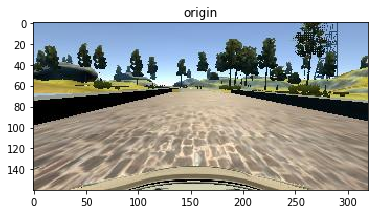

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread(data['center'][0].strip())
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('origin')

## Loss

|  Model  |  Loss    |  Val Loss  |
|  -----  |  :----:  |  :----:    |
| train-noraml  | <img src="train-normal/loss.svg" width=256 height=256 />  | <img src="train-normal/val_loss.svg" width=256 height=256 />  |
| train-dropout | <img src="train-dropout/loss.svg" width=256 height=256 /> | <img src="train-dropout/val_loss.svg" width=256 height=256 /> |
| train-vgg16   | <img src="train-vgg16/loss.svg" width=256 height=256 />   | <img src="train-vgg16/val_loss.svg" width=256 height=256 />   |
| train-vgg19   | <img src="train-vgg19/loss.svg" width=256 height=256 />   | <img src="train-vgg19/val_loss.svg" width=256 height=256 />   |

## 评估

1. 实际与预测偏差不超过0.05
2. 实际与预测偏差不超过0.10
3. 实际与预测偏差不超过0.15
4. 实际与预测偏差不超过0.20
5. 实际与预测偏差不超过0.25

In [5]:
from sklearn.model_selection import train_test_split

VALIDATION_SPLIT = 0.2  # 20% 验证集

train_data, valid_data = train_test_split(
    range(len(data)), test_size=VALIDATION_SPLIT, random_state=1)

In [6]:
from keras.models import load_model

model_normal = load_model('train-normal/model/model.h5')
model_dropout = load_model('train-dropout/model/model.h5')
model_vgg16 = load_model('train-vgg16/model/model.h5')
model_vgg19 = load_model('train-vgg19/model/model.h5')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
num1 = []
num2 = []
num3 = []
num4 = []
num5 = []
y_preds = []

In [8]:
import numpy as np

CROP = range(60, 140)
RESIZE = (200, 66)


def process(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[CROP]
    image = cv2.resize(image, RESIZE)
    return image


X_test = []
y_test = []

for index in valid_data:
    image = process(data['center'][index].strip())
    steer = data['steering'][index]

    X_test.append(image)
    y_test.append(steer)

## train-normal

In [9]:
n1 = 0
n2 = 0
n3 = 0
n4 = 0
n5 = 0
y_pred = []

for X, y in zip(X_test, y_test):
    pred = model_normal.predict(np.expand_dims(X, axis=0))[0][0]
    y_pred.append(pred)
    if np.abs(y - pred) <= 0.05:
        n1 += 1
    if np.abs(y - pred) <= 0.10:
        n2 += 1
    if np.abs(y - pred) <= 0.15:
        n3 += 1
    if np.abs(y - pred) <= 0.20:
        n4 += 1
    if np.abs(y - pred) <= 0.25:
        n5 += 1

num1.append(n1 / len(X_test))
num2.append(n2 / len(X_test))
num3.append(n3 / len(X_test))
num4.append(n4 / len(X_test))
num5.append(n5 / len(X_test))
y_preds.append(y_pred)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('MAE: %f' % mae)
print('MSE: %f' % mse)

MAE: 0.131574
MSE: 0.027134


## train-dropout

In [11]:
n1 = 0
n2 = 0
n3 = 0
n4 = 0
n5 = 0
y_pred = []

for X, y in zip(X_test, y_test):
    pred = model_dropout.predict(np.expand_dims(X, axis=0))[0][0]
    y_pred.append(pred)
    if np.abs(y - pred) <= 0.05:
        n1 += 1
    if np.abs(y - pred) <= 0.10:
        n2 += 1
    if np.abs(y - pred) <= 0.15:
        n3 += 1
    if np.abs(y - pred) <= 0.20:
        n4 += 1
    if np.abs(y - pred) <= 0.25:
        n5 += 1

num1.append(n1 / len(X_test))
num2.append(n2 / len(X_test))
num3.append(n3 / len(X_test))
num4.append(n4 / len(X_test))
num5.append(n5 / len(X_test))
y_preds.append(y_pred)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('MAE: %f' % mae)
print('MSE: %f' % mse)

MAE: 0.124541
MSE: 0.023971


In [13]:
import numpy as np

CROP = range(60, 140)
RESIZE = (128, 128)


def process(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[CROP]
    image = cv2.resize(image, RESIZE)
    return image


X_test = []
y_test = []

for index in valid_data:
    image = process(data['center'][index].strip())
    steer = data['steering'][index]

    X_test.append(image)
    y_test.append(steer)

## train-vgg16

In [14]:
n1 = 0
n2 = 0
n3 = 0
n4 = 0
n5 = 0
y_pred = []

for X, y in zip(X_test, y_test):
    pred = model_vgg16.predict(np.expand_dims(X, axis=0))[0][0]
    y_pred.append(pred)
    if np.abs(y - pred) <= 0.05:
        n1 += 1
    if np.abs(y - pred) <= 0.10:
        n2 += 1
    if np.abs(y - pred) <= 0.15:
        n3 += 1
    if np.abs(y - pred) <= 0.20:
        n4 += 1
    if np.abs(y - pred) <= 0.25:
        n5 += 1

num1.append(n1 / len(X_test))
num2.append(n2 / len(X_test))
num3.append(n3 / len(X_test))
num4.append(n4 / len(X_test))
num5.append(n5 / len(X_test))
y_preds.append(y_pred)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('MAE: %f' % mae)
print('MSE: %f' % mse)

MAE: 0.129367
MSE: 0.026471


## train-vgg19

In [16]:
n1 = 0
n2 = 0
n3 = 0
n4 = 0
n5 = 0
y_pred = []

for X, y in zip(X_test, y_test):
    pred = model_vgg19.predict(np.expand_dims(X, axis=0))[0][0]
    y_pred.append(pred)
    if np.abs(y - pred) <= 0.05:
        n1 += 1
    if np.abs(y - pred) <= 0.10:
        n2 += 1
    if np.abs(y - pred) <= 0.15:
        n3 += 1
    if np.abs(y - pred) <= 0.20:
        n4 += 1
    if np.abs(y - pred) <= 0.25:
        n5 += 1

num1.append(n1 / len(X_test))
num2.append(n2 / len(X_test))
num3.append(n3 / len(X_test))
num4.append(n4 / len(X_test))
num5.append(n5 / len(X_test))
y_preds.append(y_pred)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('MAE: %f' % mae)
print('MSE: %f' % mse)

MAE: 0.090679
MSE: 0.015195


## Evaluate

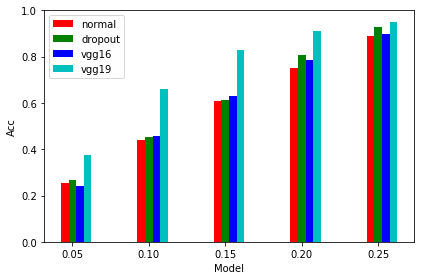

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

name_list = ['0.05', '0.10', '0.15', '0.20', '0.25']
list0 = [num1[0], num2[0], num3[0], num4[0], num5[0]]
list1 = [num1[1], num2[1], num3[1], num4[1], num5[1]]
list2 = [num1[2], num2[2], num3[2], num4[2], num5[2]]
list3 = [num1[3], num2[3], num3[3], num4[3], num5[3]]

# 设置柱状图
bar_width = 0.1
index = np.arange(len(name_list))
bar0 = plt.bar(index + bar_width * 0, list0,
               bar_width, color='r', label='normal')
bar1 = plt.bar(index + bar_width * 1, list1,
               bar_width, color='g', label='dropout')
bar2 = plt.bar(index + bar_width * 2, list2,
               bar_width, color='b', label='vgg16')
bar3 = plt.bar(index + bar_width * 3, list3,
               bar_width, color='c', label='vgg19')
plt.xlabel('Model')
plt.ylabel('Acc')
plt.xticks(index + bar_width, name_list)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

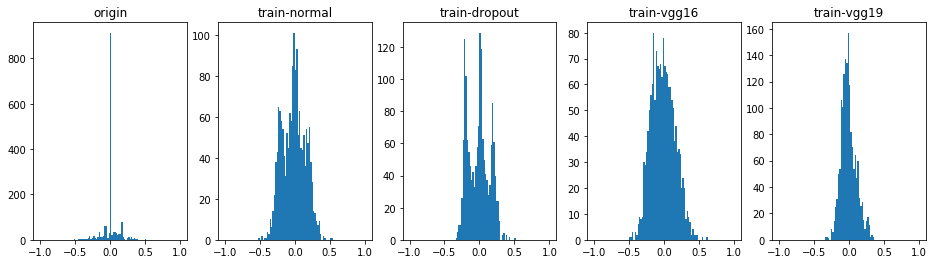

In [19]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 5, 1)
plt.title('origin')
plt.hist(np.array(y_test), bins=100, range=(-1, 1))

plt.subplot(1, 5, 2)
plt.title('train-normal')
plt.hist(np.array(y_preds[0]), bins=100, range=(-1, 1))

plt.subplot(1, 5, 3)
plt.title('train-dropout')
plt.hist(np.array(y_preds[1]), bins=100, range=(-1, 1))

plt.subplot(1, 5, 4)
plt.title('train-vgg16')
plt.hist(np.array(y_preds[2]), bins=100, range=(-1, 1))

plt.subplot(1, 5, 5)
plt.title('train-vgg19')
plt.hist(np.array(y_preds[3]), bins=100, range=(-1, 1))

plt.show()